### realized volatility 측정

5 days


In [3]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
GSPC_data = pd.read_csv('data/GSPC.csv')

In [55]:
GSPC_data['log_price_return'] = np.log(GSPC_data['Adj Close']).diff(1)
GSPC_data['squared_log_price_return'] = GSPC_data['log_price_return'] ** 2

In [57]:
GSPC_data

,Date,Open,High,Low,Close,Adj Close,Volume,log_price_return,squared_log_price_return
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN,NaN
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.039099,1.528746e-03
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,0.001920,3.687698e-06
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.000955,9.124486e-07
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.026730,7.144902e-04
...,...,...,...,...,...,...,...,...,...
3494,2013-11-21,1783.520020,1797.160034,1783.520020,1795.849976,1795.849976,3256630000,0.008096,6.554045e-05
3495,2013-11-22,1797.209961,1804.839966,1794.699951,1804.760010,1804.760010,3055140000,0.004949,2.449449e-05
3496,2013-11-25,1806.329956,1808.099976,1800.579956,1802.479980,1802.479980,2998540000,-0.001264,1.598052e-06
3497,2013-11-26,1802.869995,1808.420044,1800.770020,1802.750000,1802.750000,3427120000,0.000150,2.243801e-08


<Figure size 1000x600 with 0 Axes>

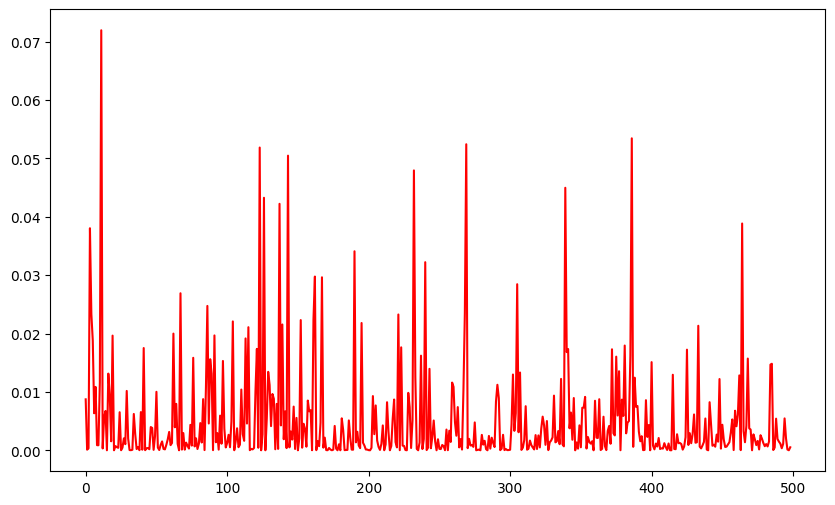

In [72]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
#논문에서 명시된 realized volatility 
volatility = GSPC_data['squared_log_price_return'].dropna().rolling(window=4).sum() / 5.0

plt.figure(figsize=(10,6))
#volatility 정규화
scaler = MinMaxScaler()
normalzied_volatility = scaler.fit_transform(volatility.values.reshape(-1,1))
normalized_squared_return = scaler.fit_transform(GSPC_data['squared_log_price_return'].values.reshape(-1,1))
# plt.plot(normalzied_volatility[3000:])
plt.plot(normalized_squared_return[3000:], color= 'red')
# plt.plot(volatility[3000:])

In [66]:
normalzied_volatility[3000]

array([0.00476254])

In [62]:
GSPC_data['squared_log_price_return'].rolling(window=4).sum() / 5

0            NaN
1            NaN
2            NaN
3            NaN
4       0.000450
          ...   
3494    0.000019
3495    0.000021
3496    0.000021
3497    0.000018
3498    0.000006
Name: squared_log_price_return, Length: 3499, dtype: float64